# Project - Modeling Complex Genomic Associations


### Import Necessary Python Packages

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score


### Load 'data.csv' (the 'X' part of the dataset)

In [20]:
# Load tab-delimited text file into a DataFrame
df_x = pd.read_csv('data.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_x.head()

First few rows of the DataFrame:


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


### Load 'labels.csv' (the 'y' part of the dataset)

In [21]:
# Load tab-delimited text file into a DataFrame
df_y = pd.read_csv('labels.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_y.head()

First few rows of the DataFrame:


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [22]:
df = pd.merge(df_x, df_y)
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [23]:
df.shape

(801, 20533)

#### Drop the instance label column

In [24]:
df = df.drop(df.columns[0], axis=1)
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


## Basic Exploratory Analysis

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


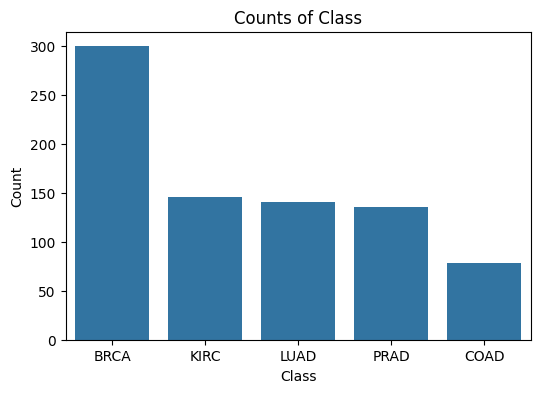

In [25]:
# Choose the column for which you want to plot the counts
column_name = 'Class'

# Get the value counts for the specified column
value_counts = df[column_name].value_counts()
print(value_counts)

# Plot the value counts using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title(f'Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [26]:
# Missing Value Assessment

# Group the DataFrame by the "class" column
grouped_df = df.groupby('Class')

# Calculate the sum of missing values in rows within each group
missing_values_per_class = grouped_df.apply(lambda x: x.isnull().sum().sum())

# Now 'missing_values_per_class' contains the sum of missing values for each class
print("Sum of missing values for each class:")
print(missing_values_per_class)

# Count missing values in dataset
total_missing_values = df.isna().sum().sum()

# Now 'total_missing_values' contains the total number of missing values in the DataFrame
print("Total number of missing values:", total_missing_values)

Sum of missing values for each class:
Class
BRCA    0
COAD    0
KIRC    0
LUAD    0
PRAD    0
dtype: int64
Total number of missing values: 0


C:\Users\megan\AppData\Local\Temp\ipykernel_16208\521584815.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_per_class = grouped_df.apply(lambda x: x.isnull().sum().sum())


### Cluster Analysis

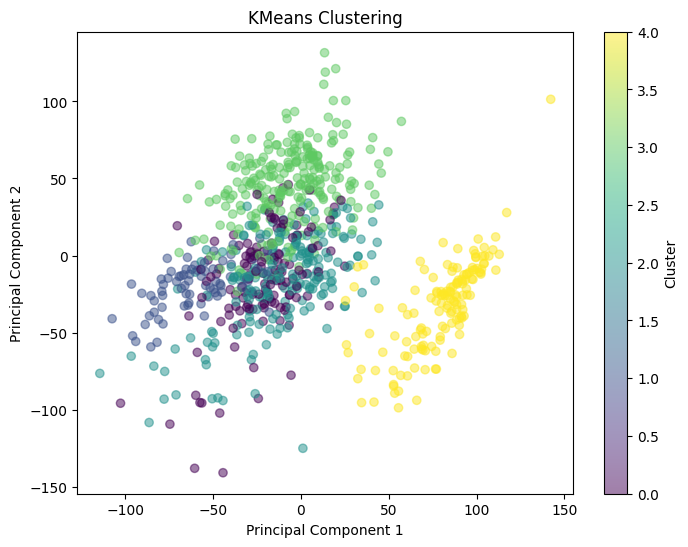

In [27]:
# Drop the class column for clustering
df_x = df.drop(columns=['Class'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_x)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

### Train and Evaluate Decision Tree Models (with 3-fold CV)

In [28]:
def train_model(model):
    # Split data into features and target
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    #kf = KFold(n_splits=3, shuffle=True, random_state=42)
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    

    # Iterate over each fold of cross-validation
    for train_index, test_index in skf.split(X,y):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        

    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print summary of model performance
    print("Average Accuracy:", avg_accuracy)
    print("Average Balanced Accuracy:", avg_balanced_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)


In [29]:
# Train a decision tree model
model = DecisionTreeClassifier()
train_model(model)

Average Accuracy: 0.968789013732834
Average Balanced Accuracy: 0.962072704515284
Average Precision: 0.9698652432265936
Average Recall: 0.968789013732834
Average F1 Score: 0.9689262895332136


In [30]:
# Train a random forest model
model = RandomForestClassifier()
train_model(model)

Average Accuracy: 0.9975031210986267
Average Balanced Accuracy: 0.997163120567376
Average Precision: 0.9975278426719077
Average Recall: 0.9975031210986267
Average F1 Score: 0.9974959081600575


In [31]:
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500)
train_model(model)

Average Accuracy: 0.9975031210986267
Average Balanced Accuracy: 0.9979148936170213
Average Precision: 0.9975031210986267
Average Recall: 0.9975031210986267
Average F1 Score: 0.9975031210986267


In [32]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
train_model(model)

Average Accuracy: 0.9975031210986267
Average Balanced Accuracy: 0.997163120567376
Average Precision: 0.9975278426719077
Average Recall: 0.9975031210986267
Average F1 Score: 0.9974959081600575


In [33]:
model = SVC(kernel='linear')
train_model(model)

Average Accuracy: 0.9987515605493135
Average Balanced Accuracy: 0.9985815602836879
Average Precision: 0.9987639213359539
Average Recall: 0.9987515605493135
Average F1 Score: 0.9987479540800287


In [34]:
model = MLPClassifier(hidden_layer_sizes=(100,))
train_model(model)

Average Accuracy: 0.7053682896379526
Average Balanced Accuracy: 0.6887553464185551
Average Precision: 0.6687994049236846
Average Recall: 0.7053682896379526
Average F1 Score: 0.6547705982981953


C:\Users\megan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
